<a href="https://colab.research.google.com/github/SujayDas1999/Neural-network/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

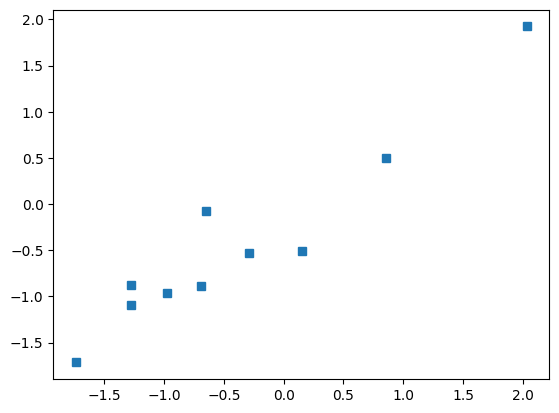

In [ ]:
N = 10
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2
plt.plot(x,y,'s')
plt.show()

In [ ]:
ANNReg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(), # activation function
    nn.Linear(1,1) # output layer
)

list(ANNReg.parameters())

[Parameter containing:
 tensor([[0.2560]], requires_grad=True),
 Parameter containing:
 tensor([0.0782], requires_grad=True),
 Parameter containing:
 tensor([[-0.1678]], requires_grad=True),
 Parameter containing:
 tensor([0.4819], requires_grad=True)]

In [ ]:
learning_rate = .05
lossfunc = nn.MSELoss()
optimizer = torch.optim.SGD(ANNReg.parameters(), lr=learning_rate)

epochs = 500

losses = torch.zeros(epochs)

for epoch in range(epochs):
  yPred = ANNReg(x)

  loss = lossfunc(yPred,y)
  losses[epoch] = loss
  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, Loss: {loss}')
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 1.7800962924957275
Epoch: 10, Loss: 1.0527753829956055
Epoch: 20, Loss: 0.935128390789032
Epoch: 30, Loss: 0.8757115602493286
Epoch: 40, Loss: 0.7530606985092163
Epoch: 50, Loss: 0.5199052691459656
Epoch: 60, Loss: 0.29618775844573975
Epoch: 70, Loss: 0.19538100063800812
Epoch: 80, Loss: 0.16370993852615356
Epoch: 90, Loss: 0.15449047088623047
Epoch: 100, Loss: 0.15185889601707458
Epoch: 110, Loss: 0.15109460055828094
Epoch: 120, Loss: 0.1508549302816391
Epoch: 130, Loss: 0.15076659619808197
Epoch: 140, Loss: 0.15072570741176605
Epoch: 150, Loss: 0.15070238709449768
Epoch: 160, Loss: 0.15068724751472473
Epoch: 170, Loss: 0.15067675709724426
Epoch: 180, Loss: 0.15066933631896973
Epoch: 190, Loss: 0.15066400170326233
Epoch: 200, Loss: 0.1506601870059967
Epoch: 210, Loss: 0.15065744519233704
Epoch: 220, Loss: 0.15065544843673706
Epoch: 230, Loss: 0.15065403282642365
Epoch: 240, Loss: 0.15065297484397888
Epoch: 250, Loss: 0.15065225958824158
Epoch: 260, Loss: 0.150651723146

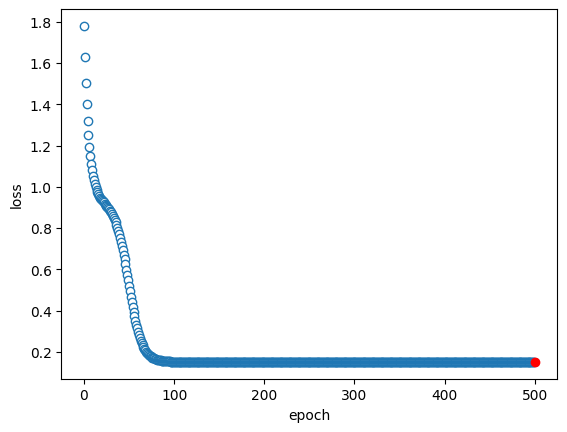

In [ ]:
predictions = ANNReg(x)

testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.plot(epochs, testloss.detach(), 'ro')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [ ]:
def data(m):
  N = 50
  x = torch.randn(N,1)
  y = m*x + torch.randn(N,1)/2
  return x,y

In [ ]:
def buildAndTrainTheModel(x,y,epochs):
  ANN = nn.Sequential(
      nn.Linear(1,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )

  lossfunc = nn.MSELoss()
  optimizer = torch.optim.SGD(ANN.parameters(),lr=0.05)
  losses = torch.zeros(epochs)

  for i in range(epochs):
    y_pred = ANN(x)
    loss = lossfunc(y_pred,y)
    losses[i] = loss
    #print(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  real_pred = ANN(x)

  return y_pred,losses

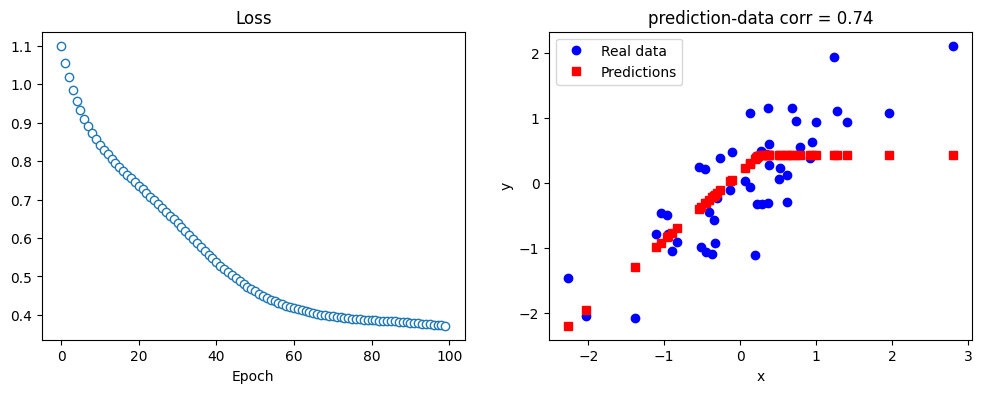

In [ ]:
# create a dataset
x,y = data(.8)

# run the model
yHat,losses = buildAndTrainTheModel(x,y,100)
yHat = yHat.detach()

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
ax[0].set_xlabel('Epoch')
ax[0].set_title('Loss')

ax[1].plot(x,y,'bo',label='Real data')
ax[1].plot(x,yHat,'rs',label='Predictions')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title(f'prediction-data corr = {np.corrcoef(y.T,yHat.T)[0,1]:.2f}')
ax[1].legend()

plt.show()

In [ ]:
slopes = np.linspace(-2,2,21)
N = 50

results = np.zeros((len(slopes),N,2))
for slopei in range(len(slopes)):
  for i in range(N):
    x,y = data(slopes[slopei])
    yHat,losses = buildAndTrainTheModel(x,y,500)
    yHat = yHat.detach()

    # store the final loss and performance
    results[slopei,i,0] = losses[-1]
    results[slopei,i,1] = np.corrcoef(y.T,yHat.T)[0,1]


# correlation can be 0 if the model didn't do well. Set nan's->0
results[np.isnan(results)] = 0


/tmp/ipython-input-4031825109.py:12: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:835.)
  results[slopei,i,0] = losses[-1]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


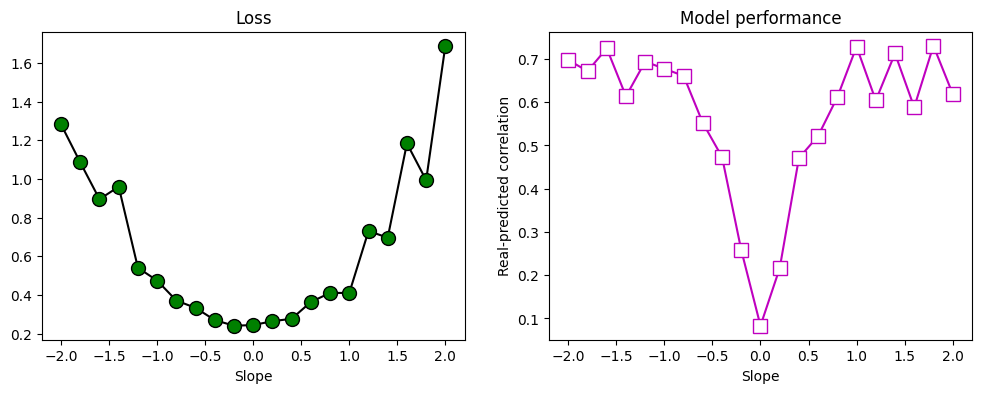

In [ ]:
# plot the results!

fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(slopes,np.mean(results[:,:,0],axis=1),'ko-',markerfacecolor='g',markersize=10)
ax[0].set_xlabel('Slope')
ax[0].set_title('Loss')

ax[1].plot(slopes,np.mean(results[:,:,1],axis=1),'ms-',markerfacecolor='w',markersize=10)
ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Real-predicted correlation')
ax[1].set_title('Model performance')

plt.show()

# ANN For Classification

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

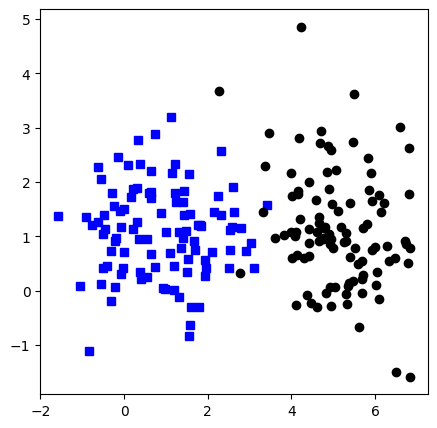

In [ ]:
nPerCluster = 100
blur = 1
A = [1,1]
B = [5,1]

a = [A[0]+np.random.randn(nPerCluster)*blur, A[1]+np.random.randn(nPerCluster*blur)]
b = [B[0]+np.random.randn(nPerCluster)*blur, B[1]+np.random.randn(nPerCluster*blur)]

labels_np = np.vstack((np.zeros((nPerCluster,1)),np.ones((nPerCluster,1))))
data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')
plt.show()


In [ ]:
ANN = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid(),
)


In [ ]:
lr = 0.01
loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(ANN.parameters(),lr=lr)
epochs = 500
losses = torch.zeros(500)

for epochi in range(epochs):
  yHat = ANN(data)
  loss = loss_func(yHat,labels)
  if epochi%10 == 0:
    print(f'Loss: {loss}')
  losses[epochi] = loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Loss: 0.7569669485092163
Loss: 0.7536405324935913
Loss: 0.7504451274871826
Loss: 0.7473756670951843
Loss: 0.744424045085907
Loss: 0.7415842413902283
Loss: 0.7388396263122559
Loss: 0.7361886501312256
Loss: 0.7336295247077942
Loss: 0.7311576008796692
Loss: 0.7287763953208923
Loss: 0.726481556892395
Loss: 0.7242690920829773
Loss: 0.7221350073814392
Loss: 0.7200710773468018
Loss: 0.7180766463279724
Loss: 0.7161348462104797
Loss: 0.7142401337623596
Loss: 0.7124040126800537
Loss: 0.7106232643127441
Loss: 0.7088823914527893
Loss: 0.7071658372879028
Loss: 0.705481767654419
Loss: 0.7038341760635376
Loss: 0.7022103071212769
Loss: 0.7006075978279114
Loss: 0.6990302205085754
Loss: 0.6974756121635437
Loss: 0.6958857774734497
Loss: 0.6942944526672363
Loss: 0.6927034258842468
Loss: 0.6911542415618896
Loss: 0.6896114349365234
Loss: 0.688057541847229
Loss: 0.6864303350448608
Loss: 0.6847856640815735
Loss: 0.6830974817276001
Loss: 0.6813918948173523
Loss: 0.6796400547027588
Loss: 0.6778097748756409
Loss

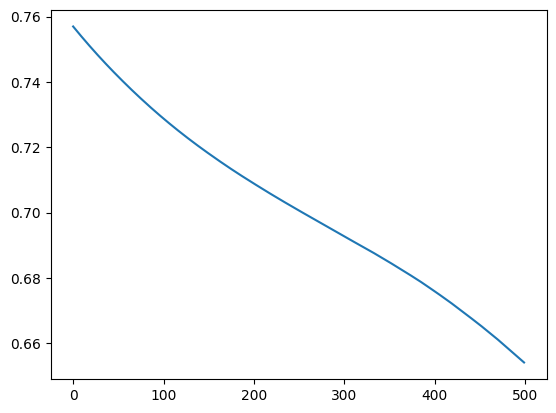

In [ ]:
plt.plot(losses.detach())

In [ ]:
predictions = ANN(data)

predlabels = predictions>.5
misclassified = np.where(predlabels!=labels)[0]
totalacc = 100 - 100*len(misclassified)/(2*nPerCluster)
print(totalacc)

50.0


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

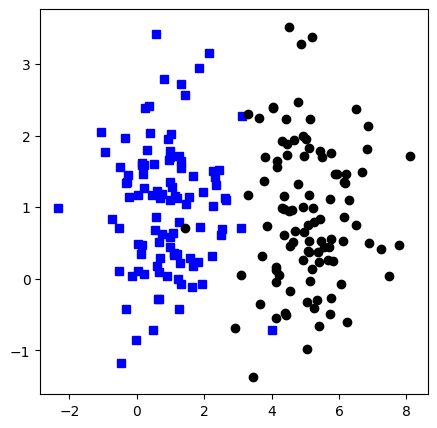

In [ ]:
nPerCluster = 100
blur = 1
A = [1,1]
B = [5,1]

a = [A[0]+np.random.randn(nPerCluster)*blur, A[1]+np.random.randn(nPerCluster*blur)]
b = [B[0]+np.random.randn(nPerCluster)*blur, B[1]+np.random.randn(nPerCluster*blur)]

labels_np = np.vstack((np.zeros((nPerCluster,1)),np.ones((nPerCluster,1))))
data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')
plt.show()


In [ ]:
def model(learning_rate):
  ANN = nn.Sequential(
      nn.Linear(2,1),
      nn.ReLU(),
      nn.Linear(1,1),
      #nn.Sigmoid()
  )

  lossfunc = nn.BCEWithLogitsLoss()

  optimizer = torch.optim.SGD(ANN.parameters(), lr=learning_rate)

  # model output
  return ANN,lossfunc,optimizer

In [ ]:
epochs = 1000
def train(ANNModel):
  losses = torch.zeros(epochs)

  for epochi in range(epochs):
    yHat = ANNModel(data)

    loss = lossfunc(yHat,labels)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  prediction = ANNModel(data)
  totalacc = 100*torch.mean(((prediction>0)==labels).float())

  return prediction,losses,totalacc


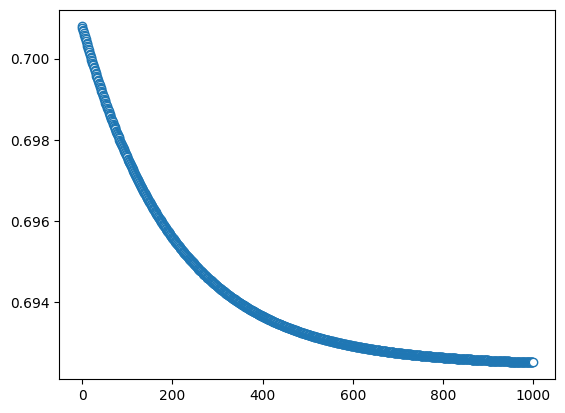

In [ ]:
ANNClassify,lossfunc,optimizer = model(0.01)

prediction,losses,totalacc = train(ANNClassify)

plt.plot(losses.detach(),'o',markerfacecolor='w')
plt.show()

In [ ]:
learning_rates = np.linspace(.001,.1,40)

accByLR = []
allLosses = torch.zeros((len(learning_rates),1000))

for i,lr in enumerate(learning_rates):
  ANNClassify, lossfunc, optimizer = model(lr)
  prediction, losses, totalacc = train(ANNClassify)

  accByLR.append(totalacc)
  allLosses[i,:] = losses.detach()

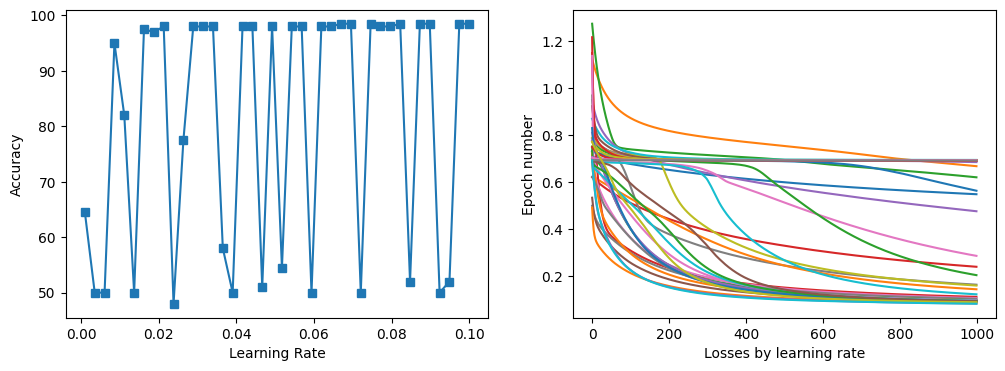

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].plot(learning_rates, accByLR, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[1].plot(allLosses.T)
ax[1].set_xlabel('Losses by learning rate')
ax[1].set_ylabel('Epoch number')
plt.show()

# Multilayer ANN

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

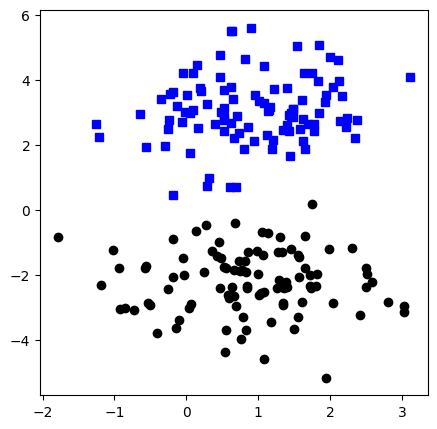

In [ ]:
nPerCluster = 100
blur = 1
A = [1,3]
B = [1,-2]

a = [A[0]+np.random.randn(nPerCluster)*blur, A[1]+np.random.randn(nPerCluster*blur)]
b = [B[0]+np.random.randn(nPerCluster)*blur, B[1]+np.random.randn(nPerCluster*blur)]

labels_np = np.vstack((np.zeros((nPerCluster,1)),np.ones((nPerCluster,1))))
data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1],'ko')
plt.show()


In [ ]:
def model(lr):
  ANNClassify = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
  )

  lossfunc = nn.BCELoss()
  optimizer = torch.optim.SGD(ANNClassify.parameters(), lr=lr)
  return ANNClassify, lossfunc, optimizer

In [ ]:
numepochs = 1000
def trainTheModel(ANNmodel):
  losses = torch.zeros(numepochs)

  for epochi in range(numepochs):
    yHat = ANNmodel(data)
    loss = lossfunc(yHat,labels)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  #final pass
  predictions = ANNmodel(data)
  totalacc = 100*torch.mean(((predictions>.5) == labels).float())

  return losses,predictions,totalacc

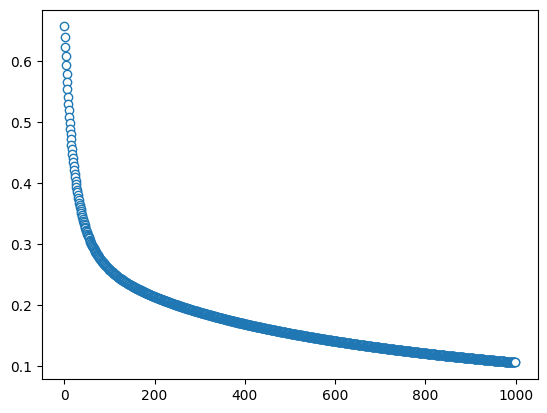

In [ ]:
ANNClassify, lossfunc,optimizer = model(0.01)
losses,predictions, totalacc = trainTheModel(ANNClassify)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)


In [ ]:
totalacc

tensor(99.)

### MULTI LAYER NN (IRIS DATASET)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import seaborn as sns

In [ ]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


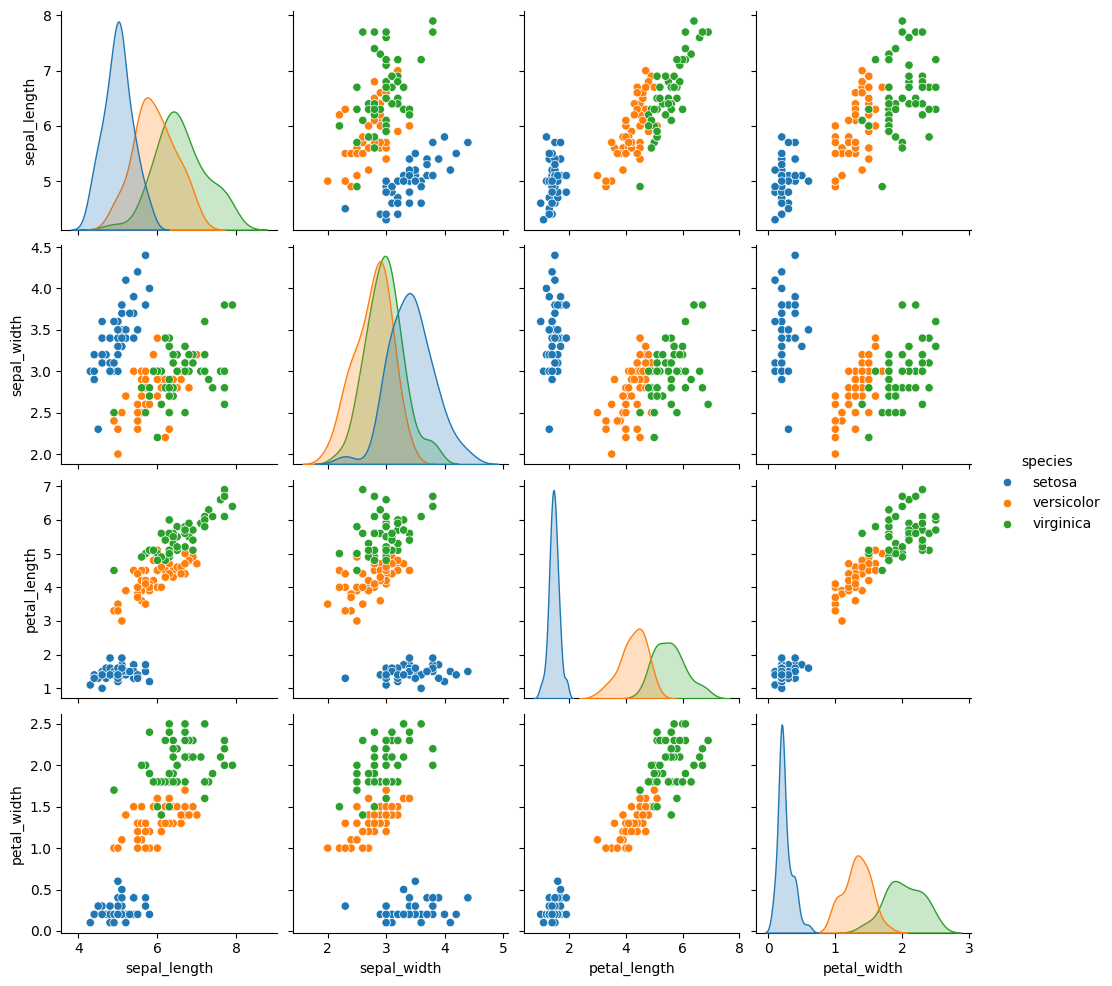

In [ ]:
sns.pairplot(iris, hue='species')
plt.show()

In [ ]:
data = torch.tensor(iris[iris.columns[0:4]].values).float()
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

data[:5], labels[:5]

(tensor([[5.1000, 3.5000, 1.4000, 0.2000],
         [4.9000, 3.0000, 1.4000, 0.2000],
         [4.7000, 3.2000, 1.3000, 0.2000],
         [4.6000, 3.1000, 1.5000, 0.2000],
         [5.0000, 3.6000, 1.4000, 0.2000]]),
 tensor([0, 0, 0, 0, 0]))

In [ ]:
ANN = nn.Sequential(
    nn.Linear(4,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,3)
)

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANN.parameters(),lr=0.01)

In [ ]:
numepochs = 1000
losses = torch.zeros(numepochs)
acc = []

for epochi in range(numepochs):
  yHat = ANN(data)
  loss = loss_func(yHat,labels)
  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  matches = torch.argmax(yHat,axis=1) == labels
  matchesNumeric = matches.float()
  accuracyPct = 100*torch.mean(matchesNumeric)
  if epochi % 10 ==0:
    print(f'Eppch: {epochi}, Loss: {loss}, Acc: {accuracyPct}')
  acc.append(accuracyPct)

Eppch: 0, Loss: 1.2139607667922974, Acc: 33.333335876464844
Eppch: 10, Loss: 1.0811609029769897, Acc: 33.333335876464844
Eppch: 20, Loss: 1.0536282062530518, Acc: 33.333335876464844
Eppch: 30, Loss: 1.0288341045379639, Acc: 33.333335876464844
Eppch: 40, Loss: 1.0028069019317627, Acc: 37.33333206176758
Eppch: 50, Loss: 0.9746192693710327, Acc: 63.33333206176758
Eppch: 60, Loss: 0.9436743259429932, Acc: 66.0
Eppch: 70, Loss: 0.9096150994300842, Acc: 66.66667175292969
Eppch: 80, Loss: 0.8727239966392517, Acc: 66.66667175292969
Eppch: 90, Loss: 0.8337005376815796, Acc: 66.66667175292969
Eppch: 100, Loss: 0.7933337092399597, Acc: 66.66667175292969
Eppch: 110, Loss: 0.752536416053772, Acc: 67.33333587646484
Eppch: 120, Loss: 0.7125411033630371, Acc: 67.33333587646484
Eppch: 130, Loss: 0.6745601892471313, Acc: 68.66666412353516
Eppch: 140, Loss: 0.6394869089126587, Acc: 70.0
Eppch: 150, Loss: 0.6077872514724731, Acc: 70.0
Eppch: 160, Loss: 0.5796086192131042, Acc: 74.0
Eppch: 170, Loss: 0.554

In [ ]:
predictions = ANN(data)
predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

print(f'Final accuracy {totalacc}%')

Final accuracy 98.0%


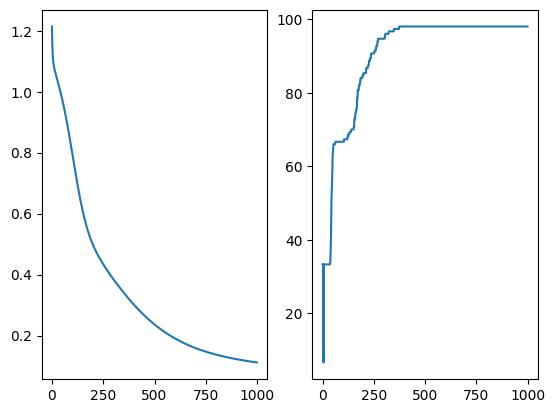

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(losses.detach())
ax2.plot(acc)
plt.show()

In [ ]:
def createIrisModel(nHidden):
  ANNiris = nn.Sequential(
      nn.Linear(4,nHidden),
      nn.ReLU(),
      nn.Linear(nHidden,nHidden),
      nn.ReLU(),
      nn.Linear(nHidden,3)
  )

  loss_func = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANNiris.parameters(),lr=.01)
  return ANNiris,loss_func,optimizer

In [ ]:
def trainTheModel(ANNiris):
  losses = torch.zeros(numepochs)
  acc = []

  for epochi in range(numepochs):
    yHat = ANNiris(data)
    loss = loss_func(yHat, labels)
    losses[epochi] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions = ANNiris(data)
  predlabels = torch.argmax(predictions,axis=1)

  return 100*torch.mean((predlabels==labels).float())

In [ ]:
numepochs = 100
numhidden = np.arange(1,129)
accuracies = []
for nunits in numhidden:
  ANNiris,loss_func,optimizer = createIrisModel(nunits)

  acc = trainTheModel(ANNiris)
  accuracies.append(acc)

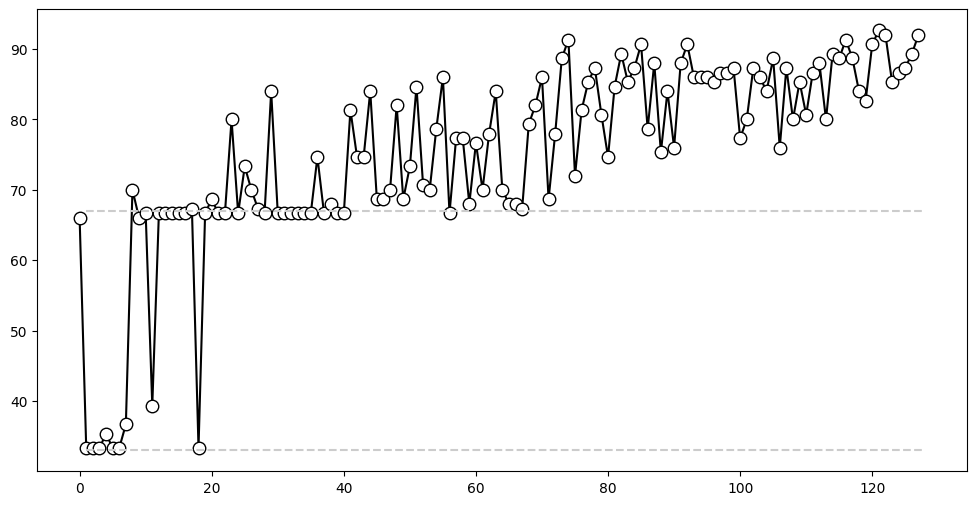

In [ ]:
fig,ax = plt.subplots(1,figsize=(12,6))
ax.plot(accuracies,'ko-',markerfacecolor='w',markersize=9)
ax.plot(numhidden[[0,-1]],[33,33], '--', color=[.8,.8,.8])
ax.plot(numhidden[[0,-1]],[67,67], '--', color=[.8,.8,.8])

### Deep VS Wide Model

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
widenet = nn.Sequential(
    nn.Linear(2,4),
    nn.Linear(4,3)
)

deepnet = nn.Sequential(
    nn.Linear(2,2),
    nn.Linear(2,2),
    nn.Linear(2,3)
)

print(widenet)
print(' ')
print(deepnet)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)
 
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


In [ ]:
for p in deepnet.named_parameters():
  print(p)
  print(" ")

('0.weight', Parameter containing:
tensor([[-0.5284, -0.5903],
        [ 0.1602, -0.5365]], requires_grad=True))
 
('0.bias', Parameter containing:
tensor([0.6624, 0.0725], requires_grad=True))
 
('1.weight', Parameter containing:
tensor([[ 0.2753, -0.2463],
        [-0.4527,  0.1137]], requires_grad=True))
 
('1.bias', Parameter containing:
tensor([-0.0258, -0.5328], requires_grad=True))
 
('2.weight', Parameter containing:
tensor([[ 0.6178,  0.3990],
        [ 0.2228,  0.3698],
        [ 0.6829, -0.3057]], requires_grad=True))
 
('2.bias', Parameter containing:
tensor([-0.6881,  0.1513, -0.1968], requires_grad=True))
 


In [ ]:
from torchsummary import summary
summary(widenet,(1,2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 4]              12
            Linear-2                 [-1, 1, 3]              15
Total params: 27
Trainable params: 27
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------
